# Exploratory Data Analysis for Spotify Tracks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## (Down)load data
We are using **Spotify Dataset 1921-2020, 600k+ Tracks** which is build from the Spotify API. Please download the [`tracks.csv` dataset from kaggle, 112 MB](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv) and [`artist.csv` dataset from kaggle, 65 MB](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv)
... and put both in the `data` folder of the project repository. This notebook should be in the `notebooks` folder of the project repository.

In [3]:
tracks_df = pd.read_csv('../data/tracks.csv')
artists_df = pd.read_csv('../data/artists.csv')

In [4]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [6]:
tracks_df.shape, artists_df.shape

((586672, 20), (1162095, 5))

In [7]:
# Cut the brackets around numerical data
tracks_df['id_artists'] = [i[2:-2] for i in tracks_df['id_artists']]
tracks_df['release_year'] = [int(i.split('-')[0]) for i in tracks_df['release_date']]

tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


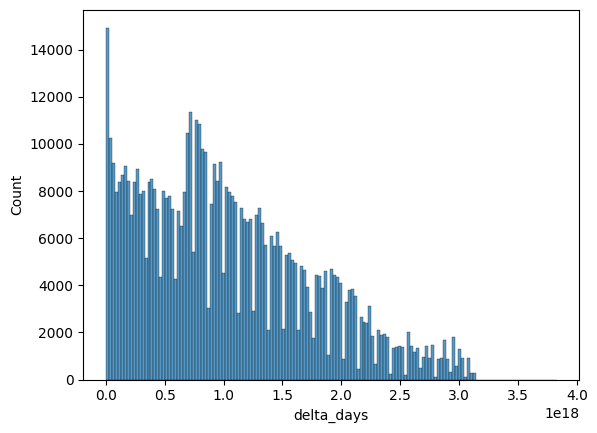

In [8]:
# convert release date to datetime
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format = '%Y-%m-%d')
tracks_df['delta_days'] = tracks_df['release_date'].max() - tracks_df['release_date']
tracks_df['delta_days'] = tracks_df['delta_days'].view(dtype = int)

sns.histplot(tracks_df['delta_days'])
plt.show()

In [9]:
# sns.histplot(tracks_df['release_date'])
# plt.show()

In [10]:
## filter songs to reduce dataframe size

#exclude non-music content
tracks_df = tracks_df[tracks_df['speechiness']<0.66] #above 0.66 are tracks with only spoken words, not music

tracks_df.shape

(564058, 22)

In [11]:
# merge tracks and artist dataframes
artists_df.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity'}, inplace = True)
artists_df.drop(['genres', 'name'],axis = 1, inplace = True)

tracks_df = tracks_df.merge(artists_df, on = 'id_artists')
del artists_df

In [12]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,delta_days,followers,artists_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.44500,...,0.674,0.744,0.1510,0.127,104.851,3,1922,3128803200000000000,91.0,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.298,0.46000,...,0.521,0.856,0.4360,0.402,87.921,4,1922,3128803200000000000,91.0,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.634,0.00399,...,0.926,0.919,0.1050,0.396,79.895,4,1922,3128803200000000000,91.0,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.657,0.32500,...,0.199,0.856,0.0931,0.105,81.944,5,1922,3128803200000000000,91.0,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.644,0.68400,...,0.144,0.802,0.0847,0.138,100.031,4,1922,3128803200000000000,91.0,4


In [13]:
tracks_df.isnull().sum() #no null values

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
release_year          0
delta_days            0
followers             0
artists_popularity    0
dtype: int64

In [14]:
corr = tracks_df.corr()

In [15]:
# show correlation of popularity with other features in descending order
corr['popularity'][np.absolute(corr['popularity'])>0.01].sort_values(ascending = False)

popularity            1.000000
artists_popularity    0.567611
release_year          0.566352
loudness              0.281752
energy                0.261373
followers             0.231527
explicit              0.175030
danceability          0.142529
time_signature        0.074359
duration_ms           0.069867
tempo                 0.057545
speechiness           0.027401
key                   0.014377
mode                 -0.016540
liveness             -0.041517
valence              -0.042216
instrumentalness     -0.198077
acousticness         -0.336503
delta_days           -0.566481
Name: popularity, dtype: float64

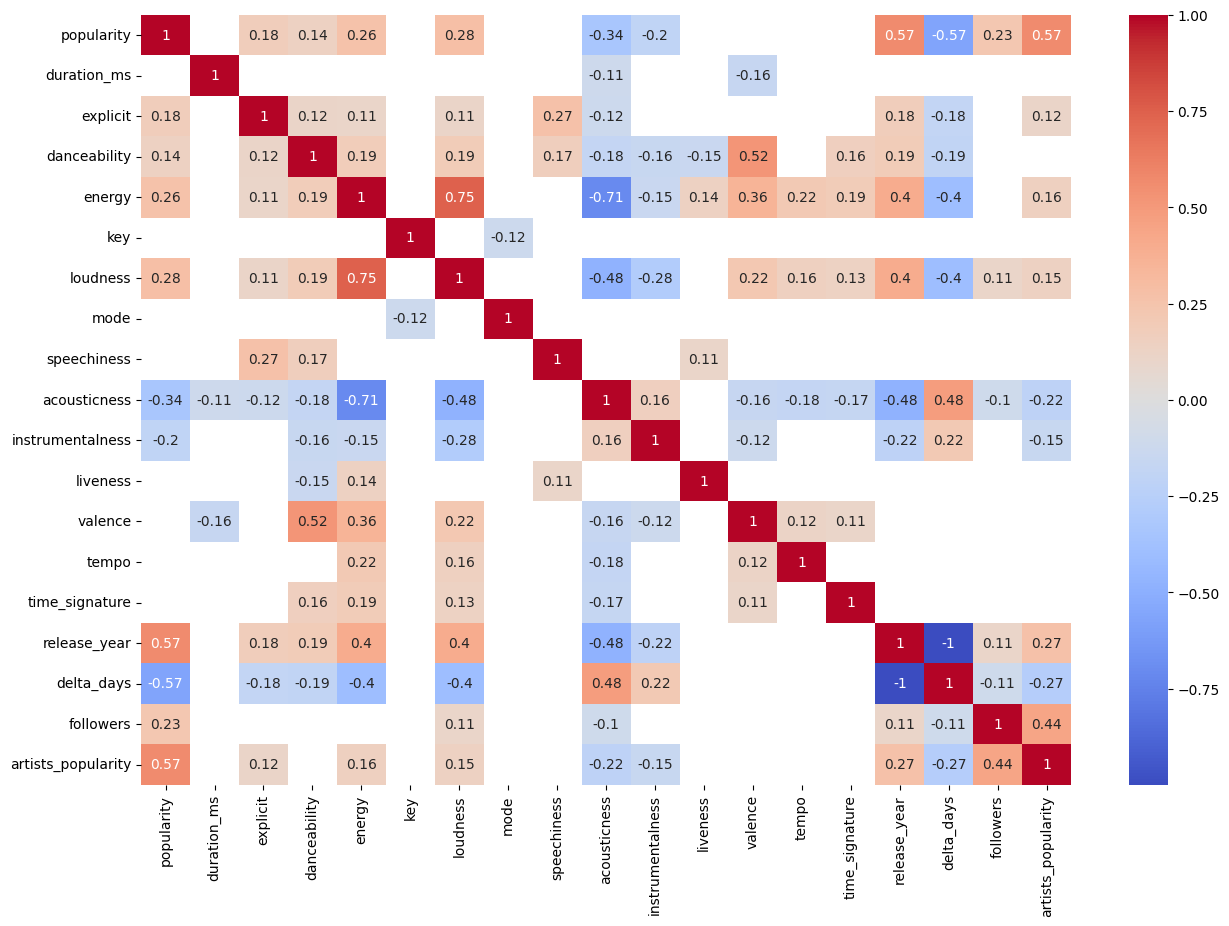

In [16]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

### Reduce memory usage of dataframe

In [17]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings              
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

In [18]:
# Randomly sample only 10% of the dataset ---> remove this for final training
# tracks_df = tracks_df.sample(n=int(tracks_df.shape[0]/10))
# tracks_df.shape

In [19]:
X = tracks_df.drop(['popularity'], axis = 1)
y = tracks_df['popularity']

#reduce_mem_usage(X)

In [20]:
y.describe()

count    452017.000000
mean         28.618609
std          17.598327
min           0.000000
25%          15.000000
50%          28.000000
75%          41.000000
max          99.000000
Name: popularity, dtype: float64

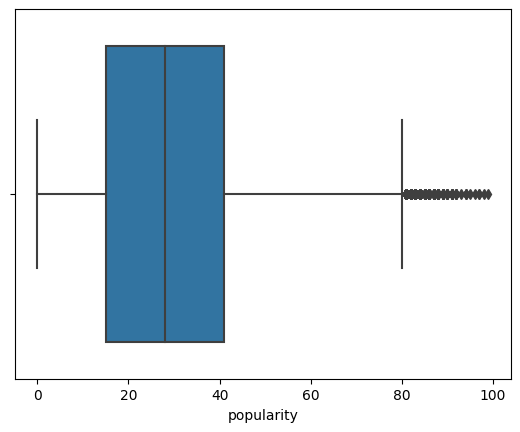

In [21]:
# target distribution
sns.boxplot(x=y)
plt.show()

In [22]:
X.shape # 23 features

(452017, 23)

In [23]:
X.dtypes

id                            object
name                          object
duration_ms                    int64
explicit                       int64
artists                       object
id_artists                    object
release_date          datetime64[ns]
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature                 int64
release_year                   int64
delta_days                     int64
followers                    float64
artists_popularity             int64
dtype: object

In [24]:
# drop select columns --> removing all object columns, removing all non-continous
X = X.drop(columns=["id", "artists", "id_artists", "release_date", "key", "time_signature"], axis=1)
X.dtypes

name                   object
duration_ms             int64
explicit                int64
danceability          float64
energy                float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
release_year            int64
delta_days              int64
followers             float64
artists_popularity      int64
dtype: object

In [25]:
X.describe()

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,delta_days,followers,artists_popularity
count,4.520170e+05,452017.000000,452017.000000,452017.000000,452017.000000,452017.000000,452017.000000,452017.000000,452017.000000,452017.00000,452017.000000,452017.000000,452017.000000,4.520170e+05,4.520170e+05,452017.000000
mean,2.304320e+05,0.036096,0.561871,0.560627,-9.674060,0.664123,0.068619,0.421141,0.097400,0.20646,0.563871,119.964448,1989.315068,9.993902e+17,1.100287e+06,49.987116
std,1.091404e+05,0.186529,0.160253,0.244420,4.484545,0.472297,0.076613,0.340801,0.245829,0.17911,0.255351,29.455168,21.120591,6.689143e+17,3.919029e+06,19.274599
min,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1900.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.798400e+05,0.000000,0.454000,0.374000,-12.229000,0.000000,0.032900,0.081300,0.000000,0.09670,0.356000,97.254000,1976.000000,4.729536e+17,1.352400e+04,38.000000
50%,2.173390e+05,0.000000,0.571000,0.567000,-8.958000,1.000000,0.041800,0.373000,0.000027,0.13500,0.574000,119.014000,1993.000000,8.926848e+17,9.935400e+04,51.000000
75%,2.632270e+05,0.000000,0.677000,0.762000,-6.375000,1.000000,0.065000,0.741000,0.006590,0.26500,0.782000,137.938000,2006.000000,1.429229e+18,6.130600e+05,64.000000
max,4.995083e+06,1.000000,0.991000,1.000000,5.376000,1.000000,0.659000,0.996000,1.000000,1.00000,1.000000,246.381000,2021.000000,3.827520e+18,7.890023e+07,100.000000


In [26]:
## Features with high correlation to target 'popularity'
# artists_popularity    0.567611
# release_year          0.566352
# loudness              0.281752
# energy                0.261373
# followers             0.231527
# explicit              0.175030
# danceability          0.142529
# time_signature        0.074359
# duration_ms           0.069867
# tempo                 0.057545
# speechiness           0.027401
# key                   0.014377
# mode                 -0.016540
# liveness             -0.041517
# valence              -0.042216
# instrumentalness     -0.198077
# acousticness         -0.336503

# For first trainings, speed things up by selecting only a few features
X_select = X[["artists_popularity", "release_year", "loudness",
             "energy", "followers", "explicit", "danceability", 
             "duration_ms", "tempo", "speechiness", "delta_days",
             "liveness", "valence", "instrumentalness", "acousticness"]]

# Part II: The modeling

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size = 0.2, random_state = 0)

### Preprocessing + Training Pipeline

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Baseline Model: Decision Trees

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

In [30]:
dt_reg.fit(X_train,y_train)

dt_pred = dt_reg.predict(X_test)

In [31]:
rmse_dt = mean_squared_error(y_test, dt_pred,squared=False)
print("Root Mean Squared Error for Decision Tree Regressor:", round(rmse_dt, 3))

Root Mean Squared Error for Decision Tree Regressor: 14.041


In [32]:
print("R2 Score for Decision Tree Regressor:", round(r2_score(y_test, dt_pred), 3))

R2 Score for Decision Tree Regressor: 0.362


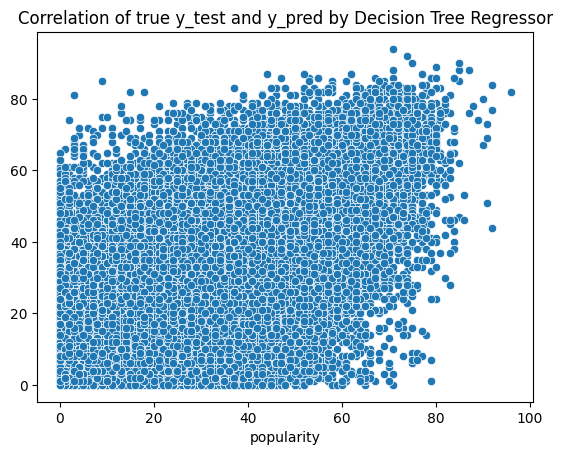

In [33]:
sns.scatterplot(x=y_test, y=dt_pred)
plt.title("Correlation of true y_test and y_pred by Decision Tree Regressor")
plt.show()

## Train using XGBoost Regressor

In [36]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    reg_alpha=0.025, 
    reg_lambda=0.5, 
    n_estimators=1000,
    learning_rate=0.01, 
    random_state=0, 
    colsample_bytree=0.6,
    subsample = 0.8,
    max_depth = 20,
    eval_metric = 'rmsle',
    early_stopping_rounds = 50
    )

xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmsle', gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0.025, reg_lambda=0.5, ...)

In [37]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test,y_test)], verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.025, reg_lambda=0.5, ...)

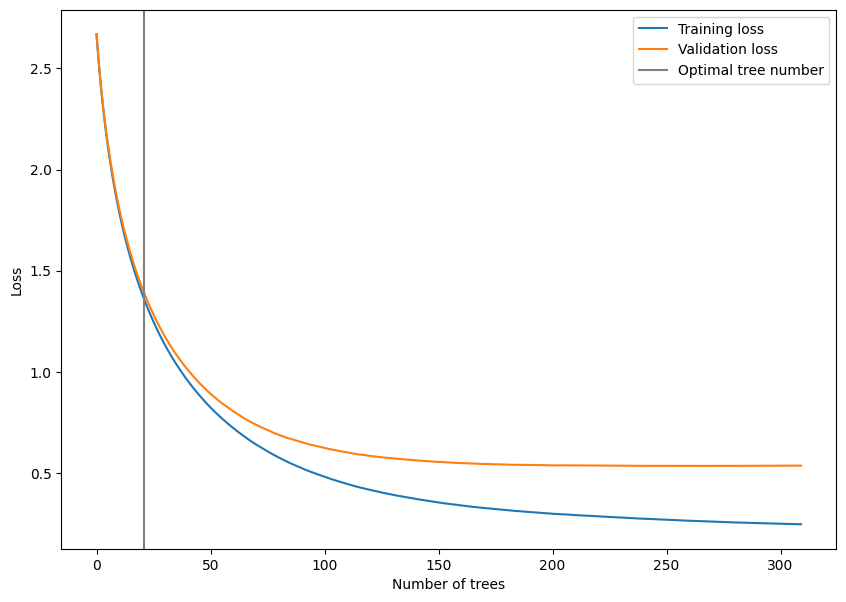

In [41]:
results = xgb_reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmsle"], label="Training loss")
plt.plot(results["validation_1"]["rmsle"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
xgb_pred = xgb_reg.predict(X_test,
                           iteration_range=(0, xgb_reg.best_iteration))
    
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)
print("Root Mean Squared Error for XGBoost Regressor:", round(rmse_xgb, 3))

Root Mean Squared Error for XGBoost Regressor: 10.263


In [53]:
print("R2 Score for XGBoost Regressor:", round(r2_score(y_test, xgb_pred), 3))

R2 Score for XGBoost Regressor: 0.659


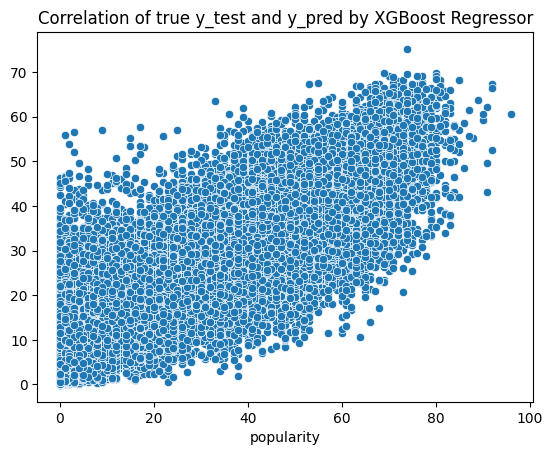

In [44]:
sns.scatterplot(x=y_test, y=xgb_pred)
plt.title("Correlation of true y_test and y_pred by XGBoost Regressor")
plt.show()

## Training using Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state = 42, n_estimators=250)
rf_reg.fit(X_train,y_train)

rf_pred = rf_reg.predict(X_test)

In [47]:
rmse_rf = mean_squared_error(y_test, rf_pred, squared=False)

print("Root Mean Squared Error for Random Forest Regressor:", round(rmse_rf, 3))

Root Mean Squared Error for Random Forest Regressor: 9.892


In [48]:
print("R2 Score for Random Forest Regressor:", round(r2_score(y_test, rf_pred), 3))

R2 Score for Random Forest Regressor: 0.683


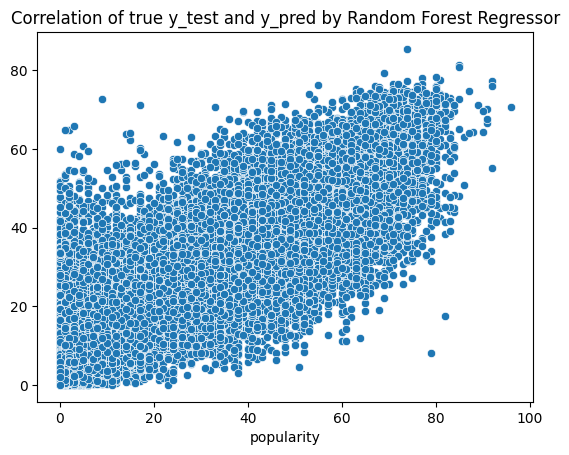

In [49]:
sns.scatterplot(x=y_test, y=rf_pred)
plt.title("Correlation of true y_test and y_pred by Random Forest Regressor")
plt.show()

## Build Ensemble Score

In [55]:
r2_combined =[]
for i in np.arange(101):
    y_ens = xgb_pred * i/100 + rf_pred * (1-i/100)
    r2_combined.append(r2_score(y_test, y_ens))

print("best ensemble prediction with R2:",round(max(r2_combined), 3))

best ensemble prediction with R2: 0.686
